In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [7]:
x, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(x, columns=['feature1', 'feature2'])

In [8]:
df

,feature1,feature2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542
...,...,...
295,1.973698,1.579798
296,2.518342,1.391766
297,0.438990,4.535929
298,0.369479,7.791105


In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.51625508, -0.70722723],
       [-0.86166376,  1.3290677 ],
       [ 0.71117444,  0.43704896],
       [-0.61979222,  1.48557283],
       [ 0.78228231, -0.8013784 ],
       [ 2.10861828, -1.43115321],
       [-1.10324303, -0.91549656],
       [ 0.86945278,  0.15961938],
       [-0.12159925,  1.72390048],
       [-0.43150951,  1.81207571],
       [-1.04455722, -0.45953113],
       [-1.63088687,  1.69370116],
       [ 0.7646714 ,  0.2070449 ],
       [-1.36015934,  1.13026612],
       [ 0.89480919, -1.54346749],
       [ 0.28171651, -0.00438029],
       [ 0.65853501,  0.21735249],
       [ 1.57701536, -1.33639314],
       [-0.64935853, -0.32288814],
       [-0.65651282, -0.68090851],
       [ 1.66622125, -1.03373539],
       [ 1.0919422 , -1.07399947],
       [ 0.45350191,  0.41296662],
       [-1.21850803, -0.431015  ],
       [-1.17062784, -0.52619438],
       [-0.33625538,  0.28117366],
       [ 1.04318676, -1.1977347 ],
       [ 0.36802836,  0.28645966],
       [-1.75960686,

In [20]:
inertia = []
k_values = range(2,12)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

In [21]:
inertia

[270.3431137506444,
 191.2742172652226,
 56.02477057509952,
 49.44858538793566,
 42.64361661581211,
 36.898261535193946,
 29.491821088221286,
 28.164080730057197,
 26.375690604448035,
 25.571765376226356]

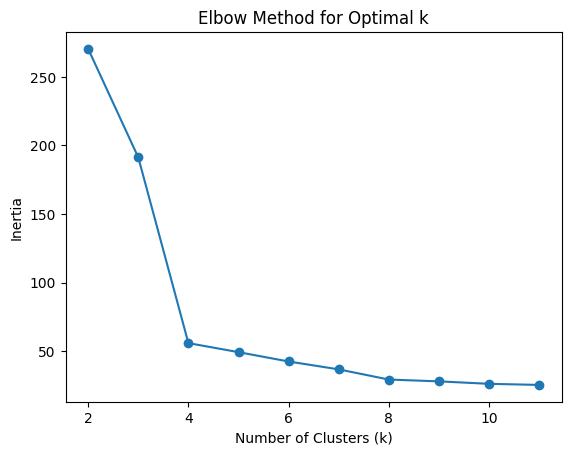

In [23]:
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

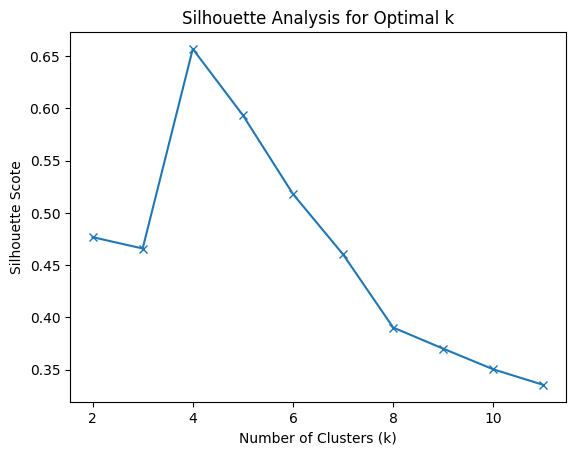

In [28]:
# Silhouette Score
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(x_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='x')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scote')
plt.title('Silhouette Analysis for Optimal k')
plt.show()


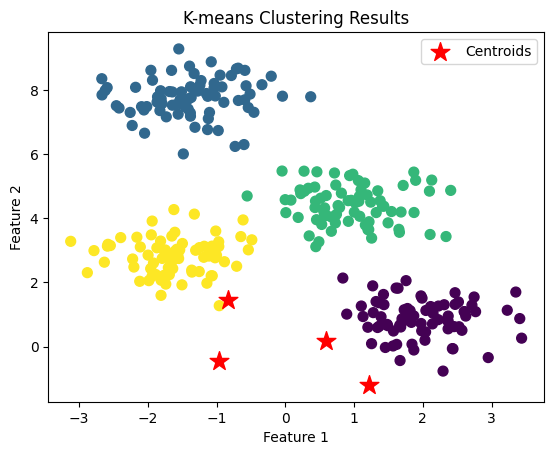

In [36]:
# We're looking for optimal cluster count with Silhouette and KMeans
# We see that 4 is the value where Silhouette is highest and also the curve of the elbow above.
# This tells us that 4 is the optimal cluster size
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(x_scaled)

# Add cluster labels to DataFrame
df['cluster'] = kmeans.labels_

# Visualize Clusters (Optimal)
plt.scatter(df['feature1'], df['feature2'], c=df['cluster'], s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()

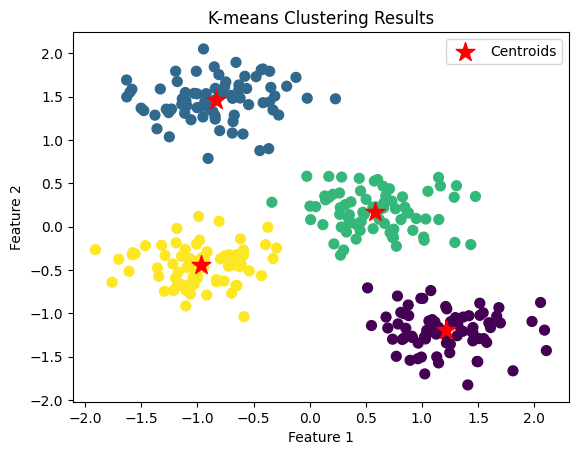

In [41]:
# ^ incorrect as we didn't apply this to the correct set - notice graph above is on df feature 1 and 2, not x_scaled
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(x_scaled)

# Add cluster labels to DataFrame
df['cluster'] = kmeans.labels_

# Visualize Clusters (Optimal)
# plt.scatter(df['feature1'], df['feature2'], c=df['cluster'], s=50, cmap='viridis')
plt.scatter(x_scaled[:,0], x_scaled[:, 1], c=df['cluster'], s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()